In [1]:
## necessary packages ##
#using Pkg
#Pkg.add("Distances")

#using Distributions
using Random
using Distances
using Distributions

In [2]:
include("../util.j")

colnorm (generic function with 1 method)

In [3]:
# packages for diagnostic test #
using StatsPlots

In [4]:
# Set the parameters of the simulated data #
p = 2;      # No. covariates
β = [1.0, -2.0]; #regression coeff
σ2 = 1.0; ϕ = 9.0; ν = 0.5; τ2 = 1.0; # hyperparmeters in matern

In [5]:
# Generate simulation data #

Random.seed!(123);
N = 1200;  #
N_ho = 200;  # No. held out positions
ind_mod = 1:(N - N_ho); # index of training observations
coords = rand(N, 2); # random location over unit square
X = hcat(fill(1, (N,)), rand(Normal(), N));                   # design matrix
D = pairwise(Euclidean(), coords, dims = 1);                  # distance matrix
Cov = σ2 * exp.(-ϕ * D);                                      # covariance matrix
z = rand(MvNormal(Cov), 1);                                   # latent process
y = X * β + z + sqrt(τ2) * rand(Normal(), N);                 # response process

In [6]:
# build neighbors #
m = 10;                                                       # number of nearest neighbor                       
n = N- N_ho;
NN = BuildNN(coords[ind_mod, :], m);                            # build nearest neighbor 
nnIndx_col = vcat(NN.nnIndx, 1:n);                            # the index of columns
nnIndx_row = zeros(Int64, 0);                                               
for i in 2:m
    nnIndx_row = vcat(nnIndx_row, fill(i, i-1))
end
nnIndx_row = vcat(nnIndx_row, repeat((m + 1):n, inner = m), 1:n);  # the index of rows


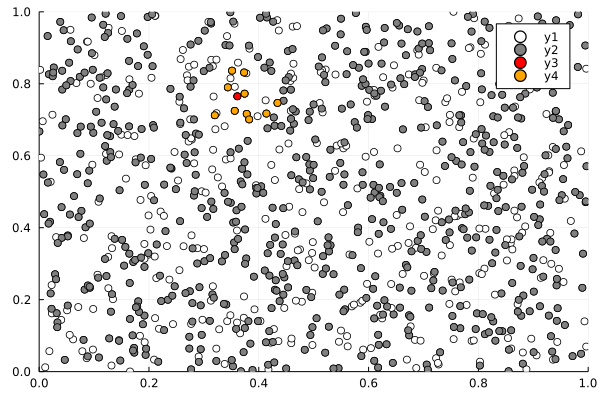

In [7]:
# check neighbors
index = 660
gr()
scatter(coords[ind_mod, 1], coords[ind_mod, 2], xlim = (0, 1), ylim = (0, 1), color = :white)
scatter!(coords[ind_mod[1:index], 1], coords[ind_mod[1:index], 2], color = :grey)
scatter!(coords[ind_mod[index:index], 1], coords[ind_mod[index:index], 2], color = :red)
scatter!(coords[ind_mod[NN.nnIndx[NN.nnIndxLU[index]:(NN.nnIndxLU[index + 1] - 1)]], 1], 
    coords[ind_mod[NN.nnIndx[NN.nnIndxLU[index]:(NN.nnIndxLU[index + 1] - 1)]], 2], color = :orange)


In [8]:
@save "simdata.jld" 

LoadError: LoadError: UndefVarError: @save not defined
in expression starting at In[8]:1